In [1]:
import cv2
import dlib 
import numpy as np 
import matplotlib.pyplot as plt 


Facial Feature Ratios:
Jawline: 0.5446
Right_eyebrow: 0.0324
Left_eyebrow: 0.0127
Nose: 0.0501
Right_eye: 0.0047
Left_eye: 0.0037
Mouth: 0.0233


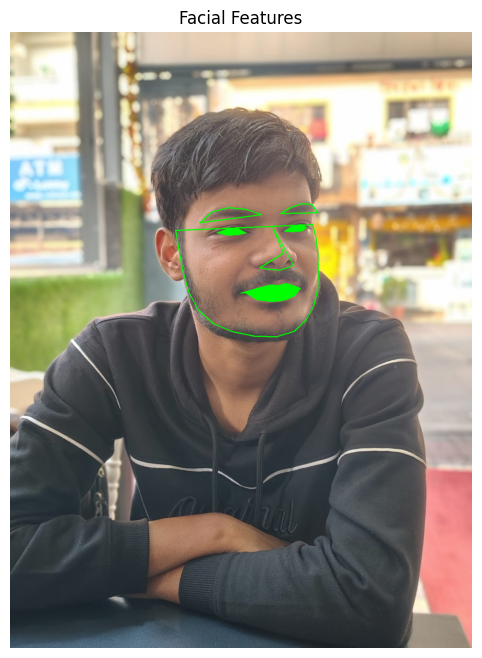

In [5]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained models
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_facial_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None, None, None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    if len(faces) == 0:
        print(f"No faces detected in {image_path}")
        return None, None, None

    face = faces[0]
    landmarks = predictor(gray, face)

    points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]

    features = {
        "jawline": points[0:17],
        "right_eyebrow": points[17:22],
        "left_eyebrow": points[22:27],
        "nose": points[27:36],
        "right_eye": points[36:42],
        "left_eye": points[42:48],
        "mouth": points[48:68],
    }

    return img, features, face

def calculate_feature_ratios(features, face):
    x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
    face_width = x2 - x1
    face_height = y2 - y1

    ratios = {}
    for feature, points in features.items():
        if feature in ["right_eye", "left_eye", "mouth"]:
            area = cv2.contourArea(np.array(points, dtype=np.int32).reshape(-1, 1, 2))
        else:
            # For non-closed contours, use bounding box area as approximation
            x, y, w, h = cv2.boundingRect(np.array(points, dtype=np.int32))
            area = w * h

        ratios[feature] = abs(area) / (face_width * face_height)

    return ratios

def validate_feature_ratios(ratios):
    expected_ranges = {
        "jawline": (0.25, 0.60),
        "right_eyebrow": (0.03, 0.07),
        "left_eyebrow": (0.01, 0.07),
        "nose": (0.05, 0.18),
        "right_eye": (0.00, 0.06),
        "left_eye": (0.00, 0.06),
        "mouth": (0.01, 0.12),
    }

    validated_ratios = {}
    for feature, ratio in ratios.items():
        min_range, max_range = expected_ranges[feature]
        if min_range <= ratio <= max_range:
            validated_ratios[feature] = ratio
        else:
            print(f"Warning: {feature} ratio ({ratio:.4f}) is out of expected range ({min_range}, {max_range})")
            validated_ratios[feature] = None

    return validated_ratios

def visualize_face(img, features):
    fig, ax = plt.subplots(figsize=(8, 8))

    for feature, points in features.items():
        points = np.array(points, dtype=np.int32)
        if feature in ["right_eye", "left_eye", "mouth"]:
            cv2.fillPoly(img, [points], (0, 255, 0))
        else:
            for i in range(len(points)):
                start = points[i]
                end = points[(i + 1) % len(points)]
                cv2.line(img, tuple(start), tuple(end), (0, 255, 0), 2)

    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    ax.set_title("Facial Features")
    plt.show()

if __name__ == "__main__":
    image_path = "C:\\Users\\Nikhil Darji\\Downloads\\rahul.jpg"

    img, features, face = get_facial_features(image_path)

    if img is not None:
        ratios = calculate_feature_ratios(features, face)
        validated_ratios = validate_feature_ratios(ratios)

        print("\nFacial Feature Ratios:")
        for feature, ratio in validated_ratios.items():
            if ratio is not None:
                print(f"{feature.capitalize()}: {ratio:.4f}")
            else:
                print(f"{feature.capitalize()}: Out of expected range")

        visualize_face(img.copy(), features)


Facial Feature Similarity Scores (%):
Jawline: 79.05%
Right_eyebrow: 79.05%
Left_eyebrow: 86.41%
Nose: 76.50%
Right_eye: 88.00%
Left_eye: 91.51%
Mouth: 69.18%


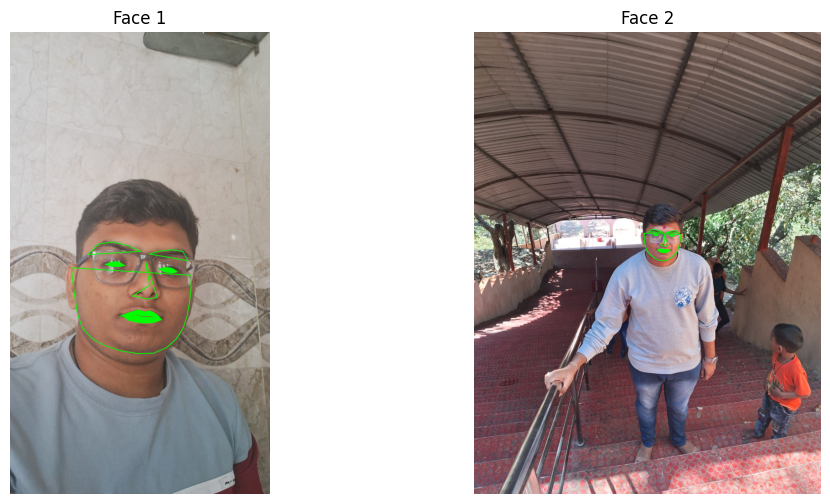

In [18]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained models
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_facial_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None, None, None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    if len(faces) == 0:
        print(f"No faces detected in {image_path}")
        return None, None, None

    face = faces[0]
    landmarks = predictor(gray, face)

    points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]

    features = {
        "jawline": points[0:17],
        "right_eyebrow": points[17:22],
        "left_eyebrow": points[22:27],
        "nose": points[27:36],
        "right_eye": points[36:42],
        "left_eye": points[42:48],
        "mouth": points[48:68],
    }

    return img, features, face

def calculate_feature_ratios(features, face):
    x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
    face_width = x2 - x1
    face_height = y2 - y1

    ratios = {}
    for feature, points in features.items():
        if feature in ["right_eye", "left_eye", "mouth"]:
            area = cv2.contourArea(np.array(points, dtype=np.int32).reshape(-1, 1, 2))
        else:
            # For non-closed contours, use bounding box area as approximation
            x, y, w, h = cv2.boundingRect(np.array(points, dtype=np.int32))
            area = w * h

        ratios[feature] = abs(area) / (face_width * face_height)

    return ratios

def compare_feature_ratios(ratios1, ratios2):
    similarity_scores = {}
    for feature in ratios1.keys():
        ratio1 = ratios1[feature]
        ratio2 = ratios2[feature]

        if ratio1 is not None and ratio2 is not None:
            max_ratio = max(ratio1, ratio2)
            min_ratio = min(ratio1, ratio2)
            if max_ratio != 0:
                similarity = (1 - abs(max_ratio - min_ratio) / max_ratio) * 100
            else:
                similarity = 100  # Both ratios are zero, consider them identical
            similarity_scores[feature] = similarity
        else:
            similarity_scores[feature] = None

    return similarity_scores

def visualize_faces(img1, img2, features1, features2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    for ax, img, features in zip(axes, [img1, img2], [features1, features2]):
        for feature, points in features.items():
            points = np.array(points, dtype=np.int32)
            if feature in ["right_eye", "left_eye", "mouth"]:
                cv2.fillPoly(img, [points], (0, 255, 0))
            else:
                for i in range(len(points)):
                    start = points[i]
                    end = points[(i + 1) % len(points)]
                    cv2.line(img, tuple(start), tuple(end), (0, 255, 0), 2)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

    axes[0].set_title("Face 1")
    axes[1].set_title("Face 2")
    plt.show()

if __name__ == "__main__":
    image1_path = "C:\\Users\\Nikhil Darji\\Downloads\\nik.jpg"
    image2_path = "C:\\Users\\Nikhil Darji\\Downloads\\nikhil.jpg"

    img1, features1, face1 = get_facial_features(image1_path)
    img2, features2, face2 = get_facial_features(image2_path)

    if img1 is not None and img2 is not None:
        ratios1 = calculate_feature_ratios(features1, face1)
        ratios2 = calculate_feature_ratios(features2, face2)

        similarity_scores = compare_feature_ratios(ratios1, ratios2)

        print("\nFacial Feature Similarity Scores (%):")
        for feature, score in similarity_scores.items():
            if score is not None:
                print(f"{feature.capitalize()}: {score:.2f}%")
            else:
                print(f"{feature.capitalize()}: Cannot be compared")

        visualize_faces(img1.copy(), img2.copy(), features1, features2)